In [ ]:
#pip install mysql-connector-python

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# Collecting data from our database

In [ ]:
# Creating a connection to your MySQL Server 
# Put your MySQL Server/Workbench password
IntegratedData = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd='your_password',
    database = 'global_country_info')

if (IntegratedData):
    print("Connection Successful")
else:
    print("Connection Failed")

Connection Successful


In [ ]:
# Create a cursor from the connection made
integrated_cursor = IntegratedData.cursor() 

integrated_statement = "SELECT c.Country, Year, ISO_CODE, yearly_average_temperature, yearly_average_temperature_uncertainty, Methane, Nitrous_oxide, Total_ghg, Total_ghg_excl_lucf, Trade_co2, Cement_co2, Coal_co2, Flaring_co2, Gas_co2, Oil_co2, Other_industry_co2, Consumption_co2, Population, GDP, Primary_Energy_Consumption, Latitude, Longitude, Commodity_ID, Commodity_Description, Area_Harvested_HA, Beginning_Stocks_MT, Ending_Stocks_MT, Imports_MT, Exports_MT, Feed_Dom_Consumption_MT, FSI_Consumption_MT, Production_MT, TY_Imports_MT, TY_Imports_from_US_MT, TY_Exports_MT, Milling_Rate_MT, Rough_Production_MT FROM Countries AS c LEFT JOIN countrylocation AS cl ON c.Country = cl.Country LEFT JOIN grains AS g ON c.Record_ID = g.Record_ID;"

integrated_cursor.execute(integrated_statement)
integrated_results_final = integrated_cursor.fetchall() 

In [ ]:
# Using the grain_results saved from the previous Query to insert
# Into a Pandas DataFrame to be used later
integrated_DF = pd.DataFrame(integrated_results_final, columns= ["Country", "Year", "ISO_CODE", "yearly_average_temperature", "yearly_average_temperature_uncertainty", "Methane", "Nitrous_oxide", "Total_ghg", "Total_ghg_excl_lucf", "Trade_co2", "Cement_co2", "Coal_co2", "Flaring_co2", "Gas_co2", "Oil_co2", "Other_industry_co2", "Consumption_co2", "Population", "GDP", "Primary_Energy_Consumption", "Latitude", "Longitude", "Commodity_ID", "Commodity_Description", "Area_Harvested_HA", "Beginning_Stocks_MT", "Ending_Stocks_MT", "Imports_MT", "Exports_MT", "Feed_Dom_Consumption_MT", "FSI_Consumption_MT", "Production_MT", "TY_Imports_MT", "TY_Imports_from_US_MT", "TY_Exports_MT", "Milling_Rate_MT", "Rough_Production_MT"])

In [ ]:
integrated_cursor.close()
IntegratedData.close()

In [ ]:
# integrated_results_final

In [ ]:
integrated_DF

,Country,Year,ISO_CODE,yearly_average_temperature,yearly_average_temperature_uncertainty,Methane,Nitrous_oxide,Total_ghg,Total_ghg_excl_lucf,Trade_co2,...,Imports_MT,Exports_MT,Feed_Dom_Consumption_MT,FSI_Consumption_MT,Production_MT,TY_Imports_MT,TY_Imports_from_US_MT,TY_Exports_MT,Milling_Rate_MT,Rough_Production_MT
0,Afghanistan,1960,AFG,13.98541667,0.441833333333333,18.76,6.94,43.61,26.26,4.825,...,51000,0,0,2330000,2279000,51000,46000,0,0,0
1,Afghanistan,1960,AFG,13.98541667,0.441833333333333,18.76,6.94,43.61,26.26,4.825,...,0,0,0,0,203000,0,0,0,6500000,313000
2,Afghanistan,1960,AFG,13.98541667,0.441833333333333,18.76,6.94,43.61,26.26,4.825,...,0,0,0,378000,378000,0,0,0,0,0
3,Afghanistan,1960,AFG,13.98541667,0.441833333333333,18.76,6.94,43.61,26.26,4.825,...,0,0,0,700000,700000,0,0,0,0,0
4,Afghanistan,1961,AFG,14.06491667,0.398083333333333,19.04,7.05,44.00,26.65,2.799,...,15000,0,0,2294000,2279000,15000,15000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27488,Zimbabwe,2012,ZWE,21.52133333,0.538500000000000,11.85,6.65,42.36,30.78,2.895,...,250000,0,0,300000,34000,250000,0,0,0,0
27489,Zimbabwe,2012,ZWE,21.52133333,0.538500000000000,11.85,6.65,42.36,30.78,2.895,...,15000,0,5000,61000,51000,15000,0,0,0,0
27490,Zimbabwe,2012,ZWE,21.52133333,0.538500000000000,11.85,6.65,42.36,30.78,2.895,...,600000,0,80000,1529000,999000,700000,0,0,0,0
27491,Zimbabwe,2012,ZWE,21.52133333,0.538500000000000,11.85,6.65,42.36,30.78,2.895,...,0,0,0,44000,44000,0,0,0,0,0


In [ ]:
#integrated_DF.to_csv('No_IDs_Integrated_Data.csv', index=False)

In [ ]:
df = pd.read_csv("No_IDs_Integrated_Data.csv")

In [ ]:
df

,Country,Year,ISO_CODE,yearly_average_temperature,yearly_average_temperature_uncertainty,Methane,Nitrous_oxide,Total_ghg,Total_ghg_excl_lucf,Trade_co2,...,Imports_MT,Exports_MT,Feed_Dom_Consumption_MT,FSI_Consumption_MT,Production_MT,TY_Imports_MT,TY_Imports_from_US_MT,TY_Exports_MT,Milling_Rate_MT,Rough_Production_MT
0,Afghanistan,1960,AFG,13.985417,0.441833,18.76,6.94,43.61,26.26,4.825,...,51000,0,0,2330000,2279000,51000,46000,0,0,0
1,Afghanistan,1960,AFG,13.985417,0.441833,18.76,6.94,43.61,26.26,4.825,...,0,0,0,0,203000,0,0,0,6500000,313000
2,Afghanistan,1960,AFG,13.985417,0.441833,18.76,6.94,43.61,26.26,4.825,...,0,0,0,378000,378000,0,0,0,0,0
3,Afghanistan,1960,AFG,13.985417,0.441833,18.76,6.94,43.61,26.26,4.825,...,0,0,0,700000,700000,0,0,0,0,0
4,Afghanistan,1961,AFG,14.064917,0.398083,19.04,7.05,44.00,26.65,2.799,...,15000,0,0,2294000,2279000,15000,15000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27488,Zimbabwe,2012,ZWE,21.521333,0.538500,11.85,6.65,42.36,30.78,2.895,...,250000,0,0,300000,34000,250000,0,0,0,0
27489,Zimbabwe,2012,ZWE,21.521333,0.538500,11.85,6.65,42.36,30.78,2.895,...,15000,0,5000,61000,51000,15000,0,0,0,0
27490,Zimbabwe,2012,ZWE,21.521333,0.538500,11.85,6.65,42.36,30.78,2.895,...,600000,0,80000,1529000,999000,700000,0,0,0,0
27491,Zimbabwe,2012,ZWE,21.521333,0.538500,11.85,6.65,42.36,30.78,2.895,...,0,0,0,44000,44000,0,0,0,0,0


In [ ]:
# Creating a connection to your MySQL Server 
# Put your MySQL Server/Workbench password
country_info = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd='your_password',
    database = 'global_country_info')

if (country_info):
    print("Connection Successful")
else:
    print("Connection Failed")

# Create a cursor from the connection made
country_info_cursor = country_info.cursor() 

country_info_statement = "SELECT c.Country, Year, ISO_CODE, yearly_average_temperature, yearly_average_temperature_uncertainty, Methane, Nitrous_oxide, Total_ghg, Total_ghg_excl_lucf, Trade_co2, Cement_co2, Coal_co2, Flaring_co2, Gas_co2, Oil_co2, Other_industry_co2, Consumption_co2, Population, GDP, Primary_Energy_Consumption, Latitude, Longitude FROM Countries AS c LEFT JOIN countrylocation AS cl ON c.Country = cl.Country;"

country_info_cursor.execute(country_info_statement)
country_info_results_final = country_info_cursor.fetchall() 

# Using the grain_results saved from the previous Query to insert
# Into a Pandas DataFrame to be used later
country_info_DF = pd.DataFrame(country_info_results_final, columns= ["Country", "Year", "ISO_CODE", "yearly_average_temperature", "yearly_average_temperature_uncertainty", "Methane", "Nitrous_oxide", "Total_ghg", "Total_ghg_excl_lucf", "Trade_co2", "Cement_co2", "Coal_co2", "Flaring_co2", "Gas_co2", "Oil_co2", "Other_industry_co2", "Consumption_co2", "Population", "GDP", "Primary_Energy_Consumption", "Longitude", "Latitude"])

country_info_cursor.close()
country_info.close()

Connection Successful


In [ ]:
country_info_DF

,Country,Year,ISO_CODE,yearly_average_temperature,yearly_average_temperature_uncertainty,Methane,Nitrous_oxide,Total_ghg,Total_ghg_excl_lucf,Trade_co2,...,Flaring_co2,Gas_co2,Oil_co2,Other_industry_co2,Consumption_co2,Population,GDP,Primary_Energy_Consumption,Longitude,Latitude
0,Afghanistan,1960,AFG,13.98541667,0.441833333333333,18.76,6.94,43.61,26.26,4.825,...,0.468,6.332,0.269,0.019,52.630,8996967,13033254000,2.950,33.939110,67.709953
1,Afghanistan,1961,AFG,14.06491667,0.398083333333333,19.04,7.05,44.00,26.65,2.799,...,0.549,7.603,0.293,0.020,33.225,9169406,13146287000,3.018,33.939110,67.709953
2,Afghanistan,1962,AFG,13.76866667,0.406166666666667,19.17,7.10,44.21,26.86,5.166,...,0.695,9.075,0.363,0.022,54.139,9351442,13367634000,3.131,33.939110,67.709953
3,Afghanistan,1963,AFG,15.03341667,0.401250000000000,19.31,7.15,44.43,27.08,5.397,...,0.476,10.127,0.392,0.027,59.306,9543200,13630298000,3.257,33.939110,67.709953
4,Afghanistan,1964,AFG,13.08491667,0.449416666666667,19.46,7.21,44.67,27.31,2.222,...,0.587,18.013,0.476,0.034,21.193,9744772,13870504000,3.279,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7203,Zimbabwe,2008,ZWE,21.54558333,0.433000000000000,10.56,5.97,35.35,24.15,1.575,...,1.532,4.545,1.608,0.039,9.295,12379553,15050220990,41.277,-19.015438,29.154857
7204,Zimbabwe,2009,ZWE,21.37725000,0.436416666666667,10.92,6.36,36.27,25.17,2.595,...,1.527,14.498,1.648,0.037,8.071,12526964,16275763662,41.112,-19.015438,29.154857
7205,Zimbabwe,2010,ZWE,21.98625000,0.409666666666667,11.45,6.77,39.30,28.08,1.497,...,1.466,12.836,1.938,0.027,9.375,12697728,17918380597,46.599,-19.015438,29.154857
7206,Zimbabwe,2011,ZWE,21.60241667,0.393416666666667,11.90,6.95,42.04,30.55,1.046,...,1.452,11.581,3.261,0.042,10.790,12894323,19554073776,51.260,-19.015438,29.154857


In [ ]:
# country_info_DF.to_csv("Country_Info_Table.csv", index=False)

In [ ]:
main = pd.read_csv("Country_Info_Table.csv")

In [ ]:
main

,Country,Year,ISO_CODE,yearly_average_temperature,yearly_average_temperature_uncertainty,Methane,Nitrous_oxide,Total_ghg,Total_ghg_excl_lucf,Trade_co2,...,Flaring_co2,Gas_co2,Oil_co2,Other_industry_co2,Consumption_co2,Population,GDP,Primary_Energy_Consumption,Longitude,Latitude
0,Afghanistan,1960,AFG,13.985417,0.441833,18.76,6.94,43.61,26.26,4.825,...,0.468,6.332,0.269,0.019,52.630,8996967,13033254000,2.950,33.939110,67.709953
1,Afghanistan,1961,AFG,14.064917,0.398083,19.04,7.05,44.00,26.65,2.799,...,0.549,7.603,0.293,0.020,33.225,9169406,13146287000,3.018,33.939110,67.709953
2,Afghanistan,1962,AFG,13.768667,0.406167,19.17,7.10,44.21,26.86,5.166,...,0.695,9.075,0.363,0.022,54.139,9351442,13367634000,3.131,33.939110,67.709953
3,Afghanistan,1963,AFG,15.033417,0.401250,19.31,7.15,44.43,27.08,5.397,...,0.476,10.127,0.392,0.027,59.306,9543200,13630298000,3.257,33.939110,67.709953
4,Afghanistan,1964,AFG,13.084917,0.449417,19.46,7.21,44.67,27.31,2.222,...,0.587,18.013,0.476,0.034,21.193,9744772,13870504000,3.279,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7203,Zimbabwe,2008,ZWE,21.545583,0.433000,10.56,5.97,35.35,24.15,1.575,...,1.532,4.545,1.608,0.039,9.295,12379553,15050220990,41.277,-19.015438,29.154857
7204,Zimbabwe,2009,ZWE,21.377250,0.436417,10.92,6.36,36.27,25.17,2.595,...,1.527,14.498,1.648,0.037,8.071,12526964,16275763662,41.112,-19.015438,29.154857
7205,Zimbabwe,2010,ZWE,21.986250,0.409667,11.45,6.77,39.30,28.08,1.497,...,1.466,12.836,1.938,0.027,9.375,12697728,17918380597,46.599,-19.015438,29.154857
7206,Zimbabwe,2011,ZWE,21.602417,0.393417,11.90,6.95,42.04,30.55,1.046,...,1.452,11.581,3.261,0.042,10.790,12894323,19554073776,51.260,-19.015438,29.154857


In [ ]:
main.describe()

,Year,yearly_average_temperature,yearly_average_temperature_uncertainty,Methane,Nitrous_oxide,Total_ghg,Total_ghg_excl_lucf,Trade_co2,Cement_co2,Coal_co2,Flaring_co2,Gas_co2,Oil_co2,Other_industry_co2,Consumption_co2,Population,GDP,Primary_Energy_Consumption,Longitude,Latitude
count,7208.00000,7208.000000,7208.000000,7208.000000,7208.000000,7208.000000,7208.000000,7208.000000,7208.000000,7208.000000,7208.000000,7208.000000,7208.000000,7208.000000,7208.000000,7.208000e+03,7.208000e+03,7208.000000,7208.000000,7208.000000
mean,1986.00000,19.573099,0.336418,27.015641,9.750287,121.693973,109.794811,0.797746,3.479010,57.641118,2.805376,25.627061,47.884726,1.573590,106.005929,3.340023e+07,2.582148e+11,507.765588,17.838758,22.469694
std,15.29812,8.101703,0.126764,87.750157,31.337612,533.368527,559.107859,62.164120,22.764138,292.317986,6.247267,105.229772,202.716907,7.164387,439.781973,1.218347e+08,1.035953e+12,2272.074884,23.844147,60.586257
min,1960.00000,-6.802917,0.127917,0.160000,0.030000,-168.240000,0.990000,-1517.839000,0.001000,0.000000,0.000000,0.000000,0.004000,0.000000,0.197000,4.738300e+04,4.536570e+08,0.033000,-40.900557,-106.346771
25%,1973.00000,12.839083,0.255896,3.627500,1.870000,13.707500,9.487500,1.745500,0.135750,0.189000,0.186000,1.117000,1.403000,0.017000,25.672000,2.975958e+06,1.078431e+10,8.829250,4.788029,-3.576021
50%,1986.00000,22.633708,0.306333,8.540000,3.610000,42.020000,22.875000,5.196500,0.448000,2.327000,0.608000,4.046000,5.240000,0.090000,61.397500,6.980012e+06,3.035226e+10,50.276000,17.858685,27.901361
75%,1999.00000,26.144917,0.379417,19.040000,6.820000,49.825000,36.297500,5.555000,1.608000,12.873000,2.232250,16.496750,23.280250,0.913000,62.828000,1.964849e+07,1.181914e+11,214.412250,35.880619,51.809925
max,2012.00000,30.127083,1.542167,1151.280000,504.170000,10690.040000,11399.830000,543.504000,714.782000,7464.806000,75.185000,1388.255000,2608.477000,141.722000,8367.184000,1.384206e+09,1.584964e+13,32512.623000,64.963051,179.414413


# Testing DBSCAN on small subsets of features

In [ ]:
# Creating a connection to your MySQL Server 
# Put your MySQL Server/Workbench password
test_info1 = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd='your_password',
    database = 'global_country_info')

if (test_info1):
    print("Connection Successful")
else:
    print("Connection Failed")

Connection Successful


In [ ]:
# Create a cursor from the connection made
test_info1_cursor = test_info1.cursor() 

#test_info1_statement = "SELECT Record_ID, yearly_average_temperature, yearly_average_temperature_uncertainty, Methane, Nitrous_oxide, Total_ghg, Total_ghg_excl_lucf, Trade_co2, Cement_co2, Coal_co2, Flaring_co2, Gas_co2, Oil_co2, Other_industry_co2, Consumption_co2, Population, GDP, Primary_Energy_Consumption, Latitude, Longitude FROM Countries AS c LEFT JOIN countrylocation AS cl ON c.Country = cl.Country;"
test_info1_statement = "SELECT Record_ID, yearly_average_temperature, yearly_average_temperature_uncertainty, Methane, Nitrous_oxide, Total_ghg, Total_ghg_excl_lucf, (Trade_co2 + Cement_co2 + Coal_co2 + Flaring_co2 + Gas_co2 + Oil_co2 + Other_industry_co2 + Consumption_co2) AS Total_co2, Population, GDP, Primary_Energy_Consumption FROM Countries;"


test_info1_cursor.execute(test_info1_statement)
test_info1_results_final = test_info1_cursor.fetchall() 

# Using the grain_results saved from the previous Query to insert
# Into a Pandas DataFrame to be used later
test_info1_DF = pd.DataFrame(test_info1_results_final, columns= ["Record_ID", "yearly_average_temperature", "yearly_average_temperature_uncertainty", "Methane", "Nitrous_oxide", "Total_ghg", "Total_ghg_excl_lucf", "Total_co2", "Population", "GDP", "Primary_Energy_Consumption"])

test_info1_cursor.close()
test_info1.close()

In [ ]:
# test_info1_DF.to_csv('Recorded_Country_Total_co2.csv', index=False)

In [ ]:
#data = test_info1_DF.drop("Record_ID", axis=1)

In [ ]:
#test_info1_DF.set_index("Record_ID", inplace=True)

In [ ]:
#main_numeric = main

In [ ]:
main.dtypes

Country                                    object
Year                                        int64
ISO_CODE                                   object
yearly_average_temperature                float64
yearly_average_temperature_uncertainty    float64
Methane                                   float64
Nitrous_oxide                             float64
Total_ghg                                 float64
Total_ghg_excl_lucf                       float64
Trade_co2                                 float64
Cement_co2                                float64
Coal_co2                                  float64
Flaring_co2                               float64
Gas_co2                                   float64
Oil_co2                                   float64
Other_industry_co2                        float64
Consumption_co2                           float64
Population                                  int64
GDP                                         int64
Primary_Energy_Consumption                float64


In [ ]:
main_numeric = main.drop(columns=["Country", "ISO_CODE"])

In [ ]:
scaler = StandardScaler()
main_scaled = scaler.fit_transform(main_numeric)

In [ ]:
main_scaled.shape

(7208, 20)

In [ ]:
main[["Year", "yearly_average_temperature", "yearly_average_temperature_uncertainty", "Methane", "Nitrous_oxide", "Total_ghg", "Total_ghg_excl_lucf", "Trade_co2", "Cement_co2", "Coal_co2", "Flaring_co2", "Gas_co2", "Oil_co2", "Other_industry_co2", "Consumption_co2", "Population", "GDP", "Primary_Energy_Consumption", "Latitude", "Longitude"]] = main_scaled

In [ ]:
main

,Country,Year,ISO_CODE,yearly_average_temperature,yearly_average_temperature_uncertainty,Methane,Nitrous_oxide,Total_ghg,Total_ghg_excl_lucf,Trade_co2,...,Flaring_co2,Gas_co2,Oil_co2,Other_industry_co2,Consumption_co2,Population,GDP,Primary_Energy_Consumption,Longitude,Latitude
0,Afghanistan,-1.699673,AFG,-0.689740,0.831649,-0.094088,-0.089684,-0.146408,-0.149418,0.064789,...,-0.374170,-0.183374,-0.234904,-0.217004,-0.121377,-0.200312,-0.236689,-0.222198,0.746760,0.675280
1,Afghanistan,-1.634301,AFG,-0.679927,0.486495,-0.090897,-0.086174,-0.145677,-0.148720,0.032195,...,-0.361203,-0.171295,-0.234786,-0.216864,-0.165505,-0.198896,-0.236580,-0.222168,0.746760,0.675280
2,Afghanistan,-1.568929,AFG,-0.716496,0.550266,-0.089415,-0.084578,-0.145283,-0.148344,0.070275,...,-0.337831,-0.157305,-0.234440,-0.216585,-0.117946,-0.197402,-0.236366,-0.222118,0.746760,0.675280
3,Afghanistan,-1.503557,AFG,-0.560376,0.511478,-0.087820,-0.082982,-0.144870,-0.147951,0.073991,...,-0.372889,-0.147308,-0.234297,-0.215887,-0.106196,-0.195828,-0.236113,-0.222063,0.746760,0.675280
4,Afghanistan,-1.438185,AFG,-0.800897,0.891476,-0.086110,-0.081068,-0.144420,-0.147540,0.022913,...,-0.355120,-0.072362,-0.233883,-0.214910,-0.192866,-0.194174,-0.235881,-0.222053,0.746760,0.675280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7203,Zimbabwe,1.438185,ZWE,0.243482,0.761961,-0.187541,-0.120639,-0.161895,-0.153192,0.012504,...,-0.203843,-0.200357,-0.228298,-0.214212,-0.219922,-0.172546,-0.234742,-0.205328,0.110349,-1.545736
7204,Zimbabwe,1.503557,ZWE,0.222703,0.788916,-0.183439,-0.108193,-0.160170,-0.151367,0.028913,...,-0.204644,-0.105767,-0.228101,-0.214491,-0.222705,-0.171336,-0.233559,-0.205401,0.110349,-1.545736
7205,Zimbabwe,1.568929,ZWE,0.297878,0.577879,-0.177398,-0.095109,-0.154489,-0.146162,0.011249,...,-0.214409,-0.121562,-0.226670,-0.215887,-0.219740,-0.169935,-0.231973,-0.202986,0.110349,-1.545736
7206,Zimbabwe,1.634301,ZWE,0.250498,0.449678,-0.172270,-0.089365,-0.149352,-0.141744,0.003994,...,-0.216650,-0.133489,-0.220144,-0.213793,-0.216522,-0.168321,-0.230394,-0.200934,0.110349,-1.545736


In [ ]:
dbscan = DBSCAN()

In [ ]:
model = dbscan.fit(main_scaled)

In [ ]:
clusters = pd.DataFrame(model.fit_predict(main_scaled))

In [ ]:
main["Clusters"] = clusters

In [ ]:
cluster_data = main["Clusters"]

In [ ]:
cluster_data

0       0
1       0
2       0
3       0
4       0
       ..
7203    1
7204    1
7205    1
7206    1
7207   -1
Name: Clusters, Length: 7208, dtype: int64

In [ ]:
len(main_scaled[0])

20

In [ ]:
main

,Country,Year,ISO_CODE,yearly_average_temperature,yearly_average_temperature_uncertainty,Methane,Nitrous_oxide,Total_ghg,Total_ghg_excl_lucf,Trade_co2,...,Gas_co2,Oil_co2,Other_industry_co2,Consumption_co2,Population,GDP,Primary_Energy_Consumption,Longitude,Latitude,Clusters
0,Afghanistan,-1.699673,AFG,-0.689740,0.831649,-0.094088,-0.089684,-0.146408,-0.149418,0.064789,...,-0.183374,-0.234904,-0.217004,-0.121377,-0.200312,-0.236689,-0.222198,0.746760,0.675280,0
1,Afghanistan,-1.634301,AFG,-0.679927,0.486495,-0.090897,-0.086174,-0.145677,-0.148720,0.032195,...,-0.171295,-0.234786,-0.216864,-0.165505,-0.198896,-0.236580,-0.222168,0.746760,0.675280,0
2,Afghanistan,-1.568929,AFG,-0.716496,0.550266,-0.089415,-0.084578,-0.145283,-0.148344,0.070275,...,-0.157305,-0.234440,-0.216585,-0.117946,-0.197402,-0.236366,-0.222118,0.746760,0.675280,0
3,Afghanistan,-1.503557,AFG,-0.560376,0.511478,-0.087820,-0.082982,-0.144870,-0.147951,0.073991,...,-0.147308,-0.234297,-0.215887,-0.106196,-0.195828,-0.236113,-0.222063,0.746760,0.675280,0
4,Afghanistan,-1.438185,AFG,-0.800897,0.891476,-0.086110,-0.081068,-0.144420,-0.147540,0.022913,...,-0.072362,-0.233883,-0.214910,-0.192866,-0.194174,-0.235881,-0.222053,0.746760,0.675280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7203,Zimbabwe,1.438185,ZWE,0.243482,0.761961,-0.187541,-0.120639,-0.161895,-0.153192,0.012504,...,-0.200357,-0.228298,-0.214212,-0.219922,-0.172546,-0.234742,-0.205328,0.110349,-1.545736,1
7204,Zimbabwe,1.503557,ZWE,0.222703,0.788916,-0.183439,-0.108193,-0.160170,-0.151367,0.028913,...,-0.105767,-0.228101,-0.214491,-0.222705,-0.171336,-0.233559,-0.205401,0.110349,-1.545736,1
7205,Zimbabwe,1.568929,ZWE,0.297878,0.577879,-0.177398,-0.095109,-0.154489,-0.146162,0.011249,...,-0.121562,-0.226670,-0.215887,-0.219740,-0.169935,-0.231973,-0.202986,0.110349,-1.545736,1
7206,Zimbabwe,1.634301,ZWE,0.250498,0.449678,-0.172270,-0.089365,-0.149352,-0.141744,0.003994,...,-0.133489,-0.220144,-0.213793,-0.216522,-0.168321,-0.230394,-0.200934,0.110349,-1.545736,1


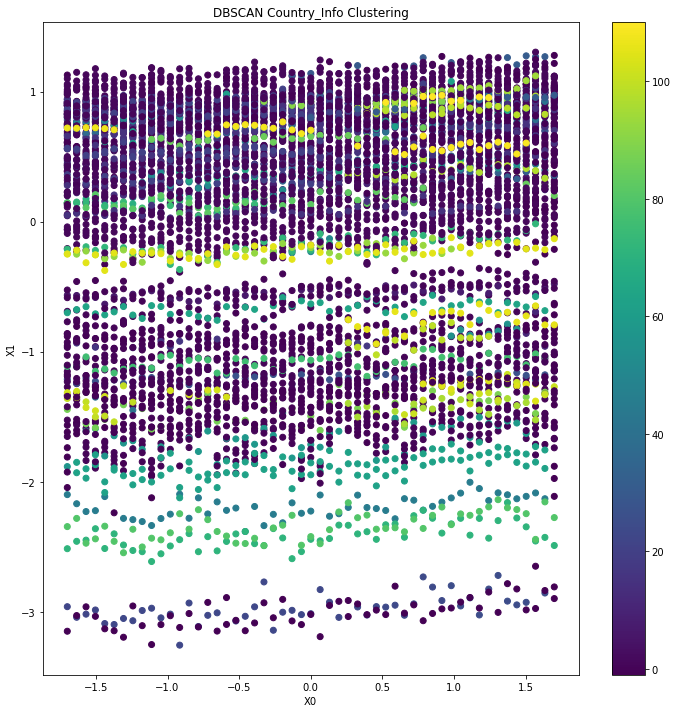

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
scatter = ax.scatter(main_scaled[:, 0], main_scaled[:, 1], c=cluster_data)
ax.set_title("DBSCAN Country_Info Clustering")
ax.set_xlabel("X0")
ax.set_ylabel("X1")
plt.colorbar(scatter)
plt.show()

# Saving Different Grains 

In [ ]:
# Creating a connection to your MySQL Server 
# Put your MySQL Server/Workbench password
grains_info = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd='your_password',
    database = 'global_country_info')

if (grains_info):
    print("Connection Successful")
else:
    print("Connection Failed")

# Create a cursor from the connection made
grains_info_cursor = grains_info.cursor() 

grains_info_statement = "SELECT c.Country, Year, yearly_average_temperature, yearly_average_temperature_uncertainty, Methane, Nitrous_oxide, Total_ghg, Total_ghg_excl_lucf, (Trade_co2 + Cement_co2 + Coal_co2 + Flaring_co2 + Gas_co2 + Oil_co2 + Other_industry_co2 + Consumption_co2) AS Total_co2, Population, GDP, Primary_Energy_Consumption, Latitude, Longitude, Commodity_ID, Commodity_Description, Area_Harvested_HA, Beginning_Stocks_MT, Ending_Stocks_MT, Imports_MT, Exports_MT, Feed_Dom_Consumption_MT, FSI_Consumption_MT, Production_MT, (Production_MT / Area_Harvested_HA) AS Yield_MT_HA, TY_Imports_MT, TY_Imports_from_US_MT, TY_Exports_MT, Milling_Rate_MT, Rough_Production_MT FROM Countries AS c LEFT JOIN countrylocation AS cl ON c.Country = cl.Country LEFT JOIN grains AS g ON c.Record_ID = g.Record_ID;"

grains_info_cursor.execute(grains_info_statement)
grains_info_results_final = grains_info_cursor.fetchall() 

# Using the grain_results saved from the previous Query to insert
# Into a Pandas DataFrame to be used later
grains_info_DF = pd.DataFrame(grains_info_results_final, columns= ["Country", "Year", "yearly_average_temperature", "yearly_average_temperature_uncertainty", "Methane", "Nitrous_oxide", "Total_ghg", "Total_ghg_excl_lucf", "Total_Co2", "Population", "GDP", "Primary_Energy_Consumption", "Longitude", "Latitude", "Commodity_ID", "Commodity_Description", "Area_Harvested_HA", "Beginning_Stocks_MT", "Ending_Stocks_MT", "Imports_MT", "Exports_MT", "Feed_Dom_Consumption_MT", "FSI_Consumption_MT", "Production_MT", "Yield_MT_HA", "TY_Imports_MT", "TY_Imports_from_US_MT", "TY_Exports_MT", "Milling_Rate_MT", "Rough_Production_MT"])

grains_info_cursor.close()
grains_info.close()

Connection Successful


In [ ]:
grains_info_DF = grains_info_DF.fillna(0)

In [ ]:
#grains_info_DF.to_csv('Grains_Yield_Integrated_Data.csv', index=False)

# Saving Final Integrated Dataset 

In [ ]:
# Creating a connection to your MySQL Server 
# Put your MySQL Server/Workbench password
final_dataset = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd='your_password',
    database = 'global_country_info')

if (final_dataset):
    print("Connection Successful")
else:
    print("Connection Failed")

# Create a cursor from the connection made
final_dataset_cursor = final_dataset.cursor() 

final_dataset_statement = "SELECT c.Country, Year, ISO_CODE, yearly_average_temperature, yearly_average_temperature_uncertainty, Methane, Nitrous_oxide, Total_ghg, Total_ghg_excl_lucf, Trade_co2, (Cement_co2 + Coal_co2 + Flaring_co2 + Gas_co2 + Oil_co2 + Other_industry_co2) AS Total_co2, Consumption_co2, Population, GDP, Primary_Energy_Consumption, Latitude, Longitude, Commodity_ID, Commodity_Description, Area_Harvested_HA, Beginning_Stocks_MT, Ending_Stocks_MT, Imports_MT, Exports_MT, Feed_Dom_Consumption_MT, FSI_Consumption_MT, Production_MT, TY_Imports_MT, TY_Imports_from_US_MT, TY_Exports_MT, Milling_Rate_MT, Rough_Production_MT FROM Countries AS c LEFT JOIN countrylocation AS cl ON c.Country = cl.Country LEFT JOIN grains AS g ON c.Record_ID = g.Record_ID;"

final_dataset_cursor.execute(final_dataset_statement)
final_dataset_results = final_dataset_cursor.fetchall() 

# Using the final_dataset saved from the previous Query to insert
# Into a Pandas DataFrame to be used later
final_dataset_DF = pd.DataFrame(final_dataset_results, columns= ["Country", "Year", "ISO_CODE", "yearly_average_temperature", "yearly_average_temperature_uncertainty", "Methane", "Nitrous_oxide", "Total_ghg", "Total_ghg_excl_lucf", "Trade_co2", "Total_Co2", "Consumption_co2", "Population", "GDP", "Primary_Energy_Consumption", "Latitude", "Longitude", "Commodity_ID", "Commodity_Description", "Area_Harvested_HA", "Beginning_Stocks_MT", "Ending_Stocks_MT", "Imports_MT", "Exports_MT", "Feed_Dom_Consumption_MT", "FSI_Consumption_MT", "Production_MT", "TY_Imports_MT", "TY_Imports_from_US_MT", "TY_Exports_MT", "Milling_Rate_MT", "Rough_Production_MT"])

final_dataset_cursor.close()
final_dataset.close()

Connection Successful


In [ ]:
final_dataset_DF.shape

(27493, 32)

In [ ]:
final_dataset_DF

,Country,Year,ISO_CODE,yearly_average_temperature,yearly_average_temperature_uncertainty,Methane,Nitrous_oxide,Total_ghg,Total_ghg_excl_lucf,Trade_co2,Total_Co2,Consumption_co2,Population,GDP,Primary_Energy_Consumption,Latitude,Longitude,Commodity_ID,Commodity_Description,Area_Harvested_HA,Beginning_Stocks_MT,Ending_Stocks_MT,Imports_MT,Exports_MT,Feed_Dom_Consumption_MT,FSI_Consumption_MT,Production_MT,TY_Imports_MT,TY_Imports_from_US_MT,TY_Exports_MT,Milling_Rate_MT,Rough_Production_MT
0,Afghanistan,1960,AFG,13.98541667,0.441833333333333,18.76,6.94,43.61,26.26,4.825,7.233,52.630,8996967,13033254000,2.950,33.939110,67.709953,410000,Wheat,2230000,0,0,51000,0,0,2330000,2279000,51000,46000,0,0,0
1,Afghanistan,1960,AFG,13.98541667,0.441833333333333,18.76,6.94,43.61,26.26,4.825,7.233,52.630,8996967,13033254000,2.950,33.939110,67.709953,422110,"Rice, Milled",207000,0,0,0,0,0,0,203000,0,0,0,6500000,313000
2,Afghanistan,1960,AFG,13.98541667,0.441833333333333,18.76,6.94,43.61,26.26,4.825,7.233,52.630,8996967,13033254000,2.950,33.939110,67.709953,430000,Barley,350000,0,0,0,0,0,378000,378000,0,0,0,0,0
3,Afghanistan,1960,AFG,13.98541667,0.441833333333333,18.76,6.94,43.61,26.26,4.825,7.233,52.630,8996967,13033254000,2.950,33.939110,67.709953,440000,Corn,500000,0,0,0,0,0,700000,700000,0,0,0,0,0
4,Afghanistan,1961,AFG,14.06491667,0.398083333333333,19.04,7.05,44.00,26.65,2.799,8.663,33.225,9169406,13146287000,3.018,33.939110,67.709953,410000,Wheat,2230000,0,0,15000,0,0,2294000,2279000,15000,15000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27488,Zimbabwe,2012,ZWE,21.52133333,0.538500000000000,11.85,6.65,42.36,30.78,2.895,16.123,10.778,13115149,20909967517,55.756,-19.015438,29.154857,410000,Wheat,10000,52000,36000,250000,0,0,300000,34000,250000,0,0,0,0
27489,Zimbabwe,2012,ZWE,21.52133333,0.538500000000000,11.85,6.65,42.36,30.78,2.895,16.123,10.778,13115149,20909967517,55.756,-19.015438,29.154857,430000,Barley,9000,4000,4000,15000,0,5000,61000,51000,15000,0,0,0,0
27490,Zimbabwe,2012,ZWE,21.52133333,0.538500000000000,11.85,6.65,42.36,30.78,2.895,16.123,10.778,13115149,20909967517,55.756,-19.015438,29.154857,440000,Corn,1281000,25000,15000,600000,0,80000,1529000,999000,700000,0,0,0,0
27491,Zimbabwe,2012,ZWE,21.52133333,0.538500000000000,11.85,6.65,42.36,30.78,2.895,16.123,10.778,13115149,20909967517,55.756,-19.015438,29.154857,459100,Millet,203000,0,0,0,0,0,44000,44000,0,0,0,0,0


In [ ]:
final_dataset_DF.to_csv('Real_Final_Integrated_Data.csv', index=False)